In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
radius = 1.0
angles = np.linspace(0, 2*np.pi, 360)
circle_x = radius * np.cos(angles)
circle_y = radius * np.sin(angles)

numSamples = 10000

unibound = 5
sigma = 1
mu = 0

uniArea = (2 * unibound) ** 2

print("Circle GT Area: ", np.pi * radius ** 2)

Circle GT Area:  3.141592653589793


In [3]:
def uniPDF(x):
    return 1 / uniArea

def normPDF(x):
    return norm.pdf(x[0]) * norm.pdf(x[1])

## Sampling uniformly

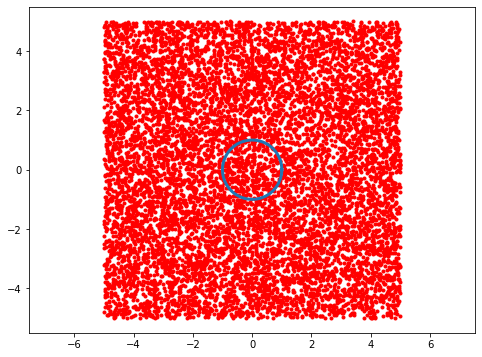

Expectation:  0.0327
Expected Area:  3.27


In [4]:
uniSamples = np.random.uniform(-unibound, unibound, (numSamples, 2))

plt.figure(figsize=(8, 6))
plt.plot(circle_x, circle_y, linewidth=3)
plt.scatter(uniSamples[:,0], uniSamples[:,1], marker=".", color='r')
plt.axis("equal")
plt.show()

dists = np.linalg.norm(uniSamples, axis=1)
inliers = (dists < radius)

exp = 0.0
for inlier in inliers:
    exp += inlier
    
print("Expectation: ", exp / numSamples)
print("Expected Area: ", exp * uniArea / numSamples)

## Sampling wisely

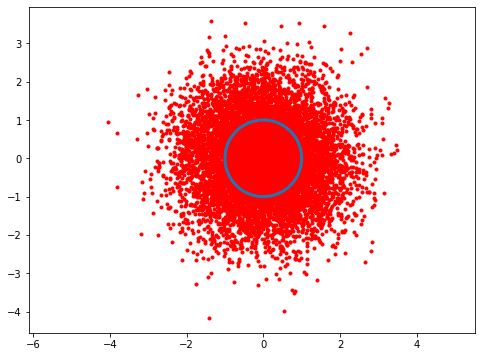

Expectation:  0.031582680904644396
Expected Area:  3.1582680904644396


In [5]:
impSamples = np.random.normal(mu, sigma, (numSamples, 2))

plt.figure(figsize=(8, 6))
plt.plot(circle_x, circle_y, linewidth=3)
plt.scatter(impSamples[:,0], impSamples[:,1], marker=".", color='r')
plt.axis("equal")
plt.show()

dists = np.linalg.norm(impSamples, axis=1)
inliers = (dists < radius)

exp = 0.0
for i, inlier in enumerate(inliers):
    exp += inlier * uniPDF(0) / normPDF(impSamples[i])
    
print("Expectation: ", exp / numSamples)
print("Expected Area: ", exp * uniArea / numSamples)